In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import os

import pandas as pd
from biomarker.data_collection import *
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
NUM_TEST = 50
SEED = 1

In [3]:
np.random.seed(SEED)

In [4]:
excel = parse_master_file()

In [5]:
L = get_filename_list(excel['Associated data'])

In [6]:
x1 = create_x1_matrix(L)

In [7]:
x4 = create_x4_matrix(L)

In [8]:
x5 = create_x5_matrix(L)

In [9]:
x6 = create_x6_matrix(L)

In [10]:
x7 = create_x7_matrix(L)

In [11]:
y = excel['Output: logK'].values
x10_x17 = excel.iloc[:, 3:-2]

In [12]:
master, master_names = prepare_master(x10_x17)

In [13]:
master_names

[u'A',
 u'B',
 u'C',
 u'D',
 u'X11: Temperature (K)',
 u'X12: [Salt*Valency]',
 0.0,
 1.0,
 2.0,
 3.0,
 u'X14: [Buffer] (mM)',
 u'X15: pH',
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 u'CI_1',
 u'CI_2',
 u'CI_4',
 u'CI_5',
 u'CI_7',
 u'CI_8',
 'N']

In [14]:
test_idxs = np.random.randint(0,len(y),NUM_TEST)
train_idxs = np.ones(y.shape,dtype=bool)
train_idxs[test_idxs] = False
y_train = y[train_idxs]
y_test = y[test_idxs]
print test_idxs

[ 37 140  72 137 133  79 144 129  71 134  25 178  20 101 146 139 156 157
 142  50  68  96  86 141 137   7  63  61  22  57   1 128  60   8 141 115
 175 121  30  71 131 149  49  57   3  24  43  76  26  52]


In [15]:
# x1_approx_train = linear_regression_approx(x1[train_idxs], y_train)
# x4_approx_train = linear_regression_approx(x4[train_idxs], y_train)
# x5_approx_train = linear_regression_approx(x5[train_idxs], y_train)
# x6_approx_train = linear_regression_approx(x6[train_idxs], y_train)
# x7_approx_train = linear_regression_approx(x7[train_idxs], y_train)

x1_approx_train = regression_tree_approx(x1[train_idxs], y_train)
x4_approx_train = regression_tree_approx(x4[train_idxs], y_train)
x5_approx_train = regression_tree_approx(x5[train_idxs], y_train)
x6_approx_train = regression_tree_approx(x6[train_idxs], y_train)
x7_approx_train = regression_tree_approx(x7[train_idxs], y_train)

In [16]:
master_train = master[train_idxs]
master_test = master[test_idxs]

In [17]:
master.shape

(191, 24)

In [18]:
regr = linear_model.LinearRegression()
all_xs_train = np.column_stack((x1_approx_train, x4_approx_train, x5_approx_train, x6_approx_train, x7_approx_train, master_train))
regr.fit(all_xs_train, y_train)

/Users/tgebhart/.virtualenvs/biomarker_2/lib/python2.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# x1_approx_test = linear_regression_approx(x1[test_idxs], y_test)
# x4_approx_test = linear_regression_approx(x4[test_idxs], y_test)
# x5_approx_test = linear_regression_approx(x5[test_idxs], y_test)
# x6_approx_test = linear_regression_approx(x6[test_idxs], y_test)
# x7_approx_test = linear_regression_approx(x7[test_idxs], y_test)

x1_approx_test = regression_tree_approx(x1[test_idxs], y_test)
x4_approx_test = regression_tree_approx(x4[test_idxs], y_test)
x5_approx_test = regression_tree_approx(x5[test_idxs], y_test)
x6_approx_test = regression_tree_approx(x6[test_idxs], y_test)
x7_approx_test = regression_tree_approx(x7[test_idxs], y_test)

In [20]:
all_xs_test = np.column_stack((x1_approx_test, x4_approx_test, x5_approx_test, x6_approx_test, x7_approx_test, master_test))

In [21]:
predictions = regr.predict(all_xs_test)
# predictions = regr.predict(master_test)

In [22]:
predictions - y_test

array([2.069924329911135, -0.7746962371393367, 0.13342152639893,
       -0.3078730266339029, 0.04844914941953693, 0.07621625313050284,
       -0.5439666883250234, -1.57083818066892, -1.230819587537205,
       0.8856897705294875, -0.8884540966080916, 0.7589867172088463,
       -1.606175779874369, -0.7608381806689213, -0.6847861436299287,
       -0.9754382052490533, 1.4324167772415164, 0.019437355732134343,
       -0.6730510029868615, -0.2010971184167305, 0.8672799022156745,
       -1.1796204677306221, 1.2300033532132488, -0.93379297109658,
       -0.3078730266339029, -0.8319631651525992, 0.3861363561647764,
       -0.2870522432922753, -0.2476506249134225, 0.9986992632260794,
       -0.45364719356807726, -1.0282477070446543, 1.604219178613116,
       0.01162516566485472, -0.93379297109658, -1.3255917931401076,
       0.07229598100427914, 0.15000656389134637, 0.006467430225402637,
       -1.230819587537205, 1.4978780616010545, 0.2982611733912115,
       0.5989028815832693, 0.9986992632260

('Coefficients: \n', array([ 0.00733819,  0.00733819,  0.41228483,  0.29166052,  0.41961988,
        0.26316747, -0.27490998, -0.01160007,  0.02334258, -0.03915987,
       -0.00402458, -0.28179079,  0.1024756 , -0.1946332 ,  0.3739484 ,
       -0.01433777,  0.08346118,  0.04364001,  0.14105814,  0.08395552,
       -0.32960486,  0.06095118, -0.45504112,  0.22596295,  0.26904504,
        0.        , -0.59722427,  0.51361739,  0.04364001]))
Mean squared error: 0.80
Variance score: 0.89


<IPython.core.display.Javascript object>


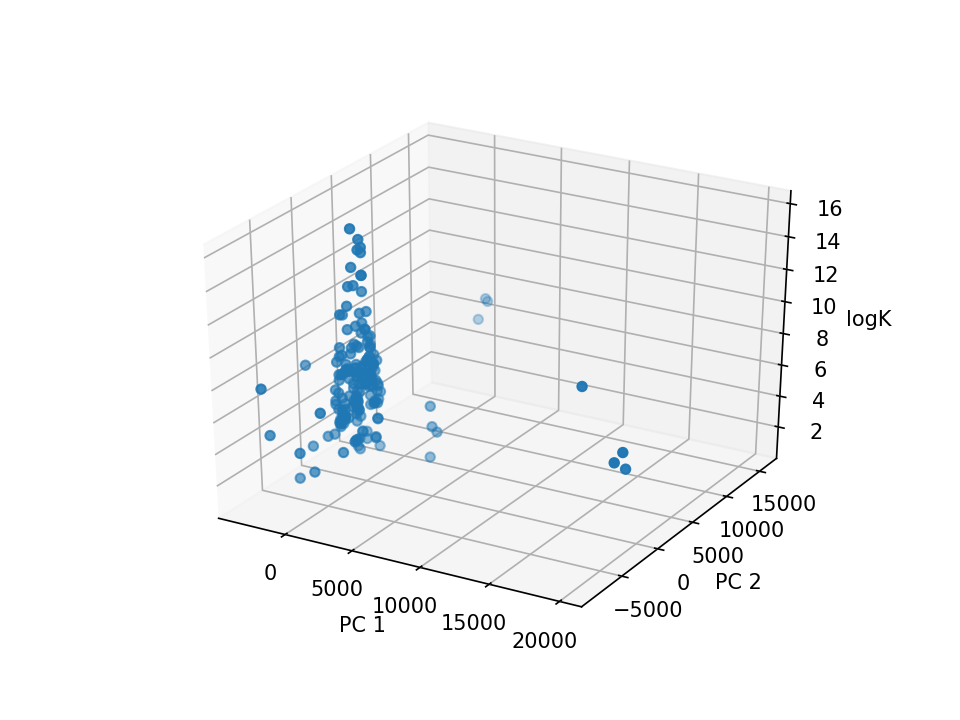

Text(0.5,0,'logK')

In [23]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))


pca = PCA(n_components=2)
all_xs = np.column_stack((x1, x4, x5, x6, x7, master))
pca.fit(all_xs)
xs_reduced = pca.transform(all_xs)

# # Plot outputs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs_reduced[:,0], xs_reduced[:,1], y)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('logK')
